# Clean Leasing Company Google Reviews

# **Group Members**
### Yitao Luo(yitaol3)
###Jiayuan Zhang(jz116)

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', 100)

The code imports the pandas, numpy, and plotly.express libraries, and sets the maximum number of columns to be displayed in pandas DataFrame outputs to 100.

# **Our Apartment**

Both me(Yitao Luo) and my group member, Jiayuan Zhang, live in Octave.

*   Compliments about Octave: The amenities are great, and the management team is responsive. The layout is spacious and well-designed, offering both functional living spaces and a cozy atmosphere.
*   Complaints about Octave: Walls are too thin. The doors have slits in them so they don't conceal the noise. Water pressure is unstable. The rent is getting more and more expensive.

## **Load data**

Read the Excel files. These are unmodified files from [Outscraper](https://outscraper.com/)'s scraped output. They contain Google reviews for leasing companies, apartment complexes, and student housing for three different campustowns.

- Brigham Young University (Provo, UT)
- Penn State University (University Park, PA)
- University of Illinois at Urbana Champaign (Champaign, IL)

In [3]:
df_byu_b = pd.read_csv('https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/byu-businesses.csv')
df_byu_r = pd.read_csv('https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/byu-reviews.csv')
df_psu_b = pd.read_csv('https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/psu-businesses.csv')
df_psu_r = pd.read_csv('https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/psu-reviews.csv')
df_uiuc_b = pd.read_csv('https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/uiuc-businesses.csv')
df_uiuc_r = pd.read_csv('https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/uiuc-reviews.csv')



The code is loading six CSV files from a GitHub repository into separate pandas dataframes

In [4]:
display(df_byu_b.head(2))
display(df_byu_r.head(2))
display(df_psu_b.head(2))
display(df_psu_r.head(2))
display(df_uiuc_b.head(2))
display(df_uiuc_r.head(2))

,query,name,site,type,subtypes,category,phone,full_address,borough,street,city,postal_code,state,us_state,country,country_code,latitude,longitude,time_zone,plus_code,area_service,rating,reviews,reviews_link,reviews_tags,reviews_per_score,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5,photos_count,photo,street_view,located_in,working_hours,working_hours_old_format,other_hours,popular_times,business_status,about,range,posts,logo,description,typical_time_spent,verified,owner_id,owner_title,owner_link,reservation_links,booking_appointment_link,menu_link,order_links,location_link,place_id,google_id,cid,reviews_id,located_google_id
0,ChIJqyXyo6GQTYcRXGfgeIpqc_I,Alpine Village,https://myalpinevillage.com/,Student housing center,"Student housing center, Apartment building, Ap...",Student housing center,+1 801-623-6093,"1378 Freedom Blvd 200 W, Provo, UT 84604, Unit...",Carterville,1378 Freedom Blvd 200 W,Provo,84604,Utah,Utah,United States of America,US,40.252607,-111.661247,America/Denver,85GC783Q+2G,False,2.9,481,https://search.google.com/local/reviews?placei...,"apartment, utilities, fees, checks, contract, ...",NaN,200,33,31,72,145,126,https://lh5.googleusercontent.com/p/AF1QipPYc7...,https://lh5.googleusercontent.com/p/AF1QipOf2I...,NaN,"{""Monday"": ""10AM-6PM"", ""Tuesday"": ""10AM-6PM"", ...",Monday:10AM-6PM|Tuesday:10AM-6PM|Wednesday:10A...,NaN,NaN,OPERATIONAL,"{""Accessibility"": {""Wheelchair-accessible car ...",NaN,NaN,https://lh5.googleusercontent.com/-hH8E8pq9CkI...,Welcome to our accommodating student housing a...,NaN,True,106402413364201152471,Alpine Village,https://www.google.com/maps/contrib/1064024133...,NaN,NaN,NaN,NaN,https://www.google.com/maps/place/Alpine+Villa...,ChIJqyXyo6GQTYcRXGfgeIpqc_I,0x874d90a1a3f225ab:0xf2736a8a78e0675c,17470424522466289500,-976319551243262116,NaN
1,ChIJGbnTbamQTYcRtZfBrL52jhs,Palladium Apartments,https://www.palladiumprovo.com/,Housing complex,Housing complex,Housing complex,+1 385-200-0510,"538 N Freedom Blvd Unit, Provo, UT 84601",North Park,538 N Freedom Blvd Unit,Provo,84601,Utah,Utah,United States of America,US,40.240917,-111.661714,America/Denver,85GC68RQ+98,False,3.8,22,https://search.google.com/local/reviews?placei...,"management, space",NaN,6,0,1,1,14,2,https://lh5.googleusercontent.com/p/AF1QipO0-D...,https://streetviewpixels-pa.googleapis.com/v1/...,NaN,"{""Monday"": ""9AM-4:30PM"", ""Tuesday"": ""9AM-4:30P...",Monday:9AM-4:30PM|Tuesday:9AM-4:30PM|Wednesday...,NaN,NaN,OPERATIONAL,"{""Accessibility"": {""Wheelchair accessible entr...",NaN,NaN,https://lh6.googleusercontent.com/-PTsCf3bop-M...,Step into Palladium and you'll have found your...,NaN,True,112123346924561479475,Palladium Apartments,https://www.google.com/maps/contrib/1121233469...,NaN,NaN,NaN,NaN,https://www.google.com/maps/place/Palladium+Ap...,ChIJGbnTbamQTYcRtZfBrL52jhs,0x874d90a96dd3b919:0x1b8e76beacc197b5,1985655047031199669,1985655047031199669,NaN


,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,author_link,author_title,author_id,author_image,review_text,review_img_url,review_img_urls,review_questions,review_photo_ids,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5
0,ChIJqyXyo6GQTYcRXGfgeIpqc_I,Alpine Village,0x874d90a1a3f225ab:0xf2736a8a78e0675c,ChIJqyXyo6GQTYcRXGfgeIpqc_I,https://www.google.com/maps/place/Alpine+Villa...,https://search.google.com/local/reviews?placei...,481,2.9,ChdDSUhNMG9nS0VJQ0FnSUQ1OXRHZnNnRRAB,CAESBkVnSUlBUQ==,https://www.google.com/maps/contrib/1005120670...,Laura Brown,100512067005706825621,https://lh3.googleusercontent.com/a-/ALV-UjUJV...,Service requests take a very long time to be r...,NaN,NaN,NaN,NaN,"Dear Laura, \n\n We hear you loud and clear, t...",1.698159e+09,10/24/2023 14:56:01,https://www.google.com/maps/reviews/data=!4m8!...,3,1698151603,10/24/2023 12:46:43,0,-976319551243262116,200,33,31,72,145
1,ChIJqyXyo6GQTYcRXGfgeIpqc_I,Alpine Village,0x874d90a1a3f225ab:0xf2736a8a78e0675c,ChIJqyXyo6GQTYcRXGfgeIpqc_I,https://www.google.com/maps/place/Alpine+Villa...,https://search.google.com/local/reviews?placei...,481,2.9,ChZDSUhNMG9nS0VJQ0FnSUNwOUstOVpBEAE,CAESBkVnSUlBZw==,https://www.google.com/maps/contrib/1029361078...,Pete Haraguchi,102936107836751613731,https://lh3.googleusercontent.com/a-/ALV-UjWJc...,I was thinking about giving two stars but I le...,https://lh5.googleusercontent.com/p/AF1QipPeIy...,https://lh5.googleusercontent.com/p/AF1QipPeIy...,NaN,"AF1QipPeIyT2ml2Z-Lnkg1OUJcOXNWr9EauKExNDhPPw, ...","Pete,\n\n Thank you for letting us know about ...",1.690671e+09,07/29/2023 22:46:48,https://www.google.com/maps/reviews/data=!4m8!...,1,1690662626,07/29/2023 20:30:26,12,-976319551243262116,200,33,31,72,145


,query,name,site,type,subtypes,category,phone,full_address,borough,street,city,postal_code,state,us_state,country,country_code,latitude,longitude,time_zone,plus_code,area_service,rating,reviews,reviews_link,reviews_tags,reviews_per_score,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5,photos_count,photo,street_view,located_in,working_hours,working_hours_old_format,other_hours,popular_times,business_status,about,range,posts,logo,description,typical_time_spent,verified,owner_id,owner_title,owner_link,reservation_links,booking_appointment_link,menu_link,order_links,location_link,place_id,google_id,cid,reviews_id,located_google_id
0,ChIJV2hrraCozokRtlPCp8iIpzs,Park Hill Apartments,https://www.liveparkhill.com/?utm_source=Googl...,Apartment complex,"Apartment complex, Student housing center",Apartment complex,+1 814-636-8515,"478 E Beaver Ave, State College, PA 16801",NaN,478 E Beaver Ave,State College,16801,Pennsylvania,Pennsylvania,United States of America,US,40.797899,-77.853648,America/New_York,87G4Q4XW+5G,False,4.7,174,https://search.google.com/local/reviews?placei...,"management, team, renovated, amenities, studen...",NaN,5,2,3,17,147,63,https://lh5.googleusercontent.com/p/AF1QipNBlh...,https://streetviewpixels-pa.googleapis.com/v1/...,NaN,"{""Monday"": ""10AM-6PM"", ""Tuesday"": ""10AM-6PM"", ...",Monday:10AM-6PM|Tuesday:10AM-6PM|Wednesday:10A...,NaN,NaN,OPERATIONAL,"{""Accessibility"": {""Wheelchair accessible entr...",NaN,NaN,https://lh6.googleusercontent.com/-y7FtFBrdnCo...,Something refreshed and better is here! Now un...,NaN,True,106304177199335709332,Park Hill Apartments,https://www.google.com/maps/contrib/1063041771...,NaN,NaN,NaN,NaN,https://www.google.com/maps/place/Park+Hill+Ap...,ChIJV2hrraCozokRtlPCp8iIpzs,0x89cea8a0ad6b6857:0x3ba788c8a7c253b6,4298554764737794998,4298554764737794998,NaN
1,ChIJgTu-OpqozokROgf58b0KflQ,"College West, LLC",http://collegewestllc.com/,Apartment rental agency,Apartment rental agency,Apartment rental agency,+1 814-238-4938,"422 Clay Ln, State College, PA 16801",NaN,422 Clay Ln,State College,16801,Pennsylvania,Pennsylvania,United States of America,US,40.791495,-77.866328,America/New_York,87G4Q4RM+HF,False,3.6,28,https://search.google.com/local/reviews?placei...,"call, prices, pay",NaN,9,0,1,1,17,1,https://streetviewpixels-pa.googleapis.com/v1/...,https://streetviewpixels-pa.googleapis.com/v1/...,NaN,"{""Monday"": ""10:30AM-5PM"", ""Tuesday"": ""10:30AM-...",Monday:10:30AM-5PM|Tuesday:10:30AM-5PM|Wednesd...,NaN,NaN,OPERATIONAL,"{""Accessibility"": {""Wheelchair accessible entr...",NaN,NaN,NaN,NaN,NaN,False,NaN,"College West, LLC",NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/place/College+West...,ChIJgTu-OpqozokROgf58b0KflQ,0x89cea89a3abe3b81:0x547e0abdf1f9073a,6088315557176215354,6088315557176215354,NaN


,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,author_link,author_title,author_id,author_image,review_text,review_img_url,review_img_urls,review_questions,review_photo_ids,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5
0,ChIJV2hrraCozokRtlPCp8iIpzs,Park Hill Apartments,0x89cea8a0ad6b6857:0x3ba788c8a7c253b6,ChIJV2hrraCozokRtlPCp8iIpzs,https://www.google.com/maps/place/Park+Hill+Ap...,https://search.google.com/local/reviews?placei...,174,4.7,ChZDSUhNMG9nS0VJQ0FnSURwbWJDaUdnEAE,CAESBkVnSUlBUQ==,https://www.google.com/maps/contrib/1164123127...,Molly Harrison,116412312721973164291,https://lh3.googleusercontent.com/a/ACg8ocL6vI...,I moved into the 1 bedroom deluxe apartment wi...,https://lh5.googleusercontent.com/p/AF1QipOdhs...,https://lh5.googleusercontent.com/p/AF1QipOdhs...,NaN,"AF1QipOdhs7G7OStqD2pt9JhkQ8E54QdwrM2c6eAeRXu, ...","Thank you for your feedback, Molly. We are tha...",1.693026e+09,08/26/2023 05:00:14,https://www.google.com/maps/reviews/data=!4m8!...,3,1692906499,08/24/2023 19:48:19,1,4298554764737794998,5,2,3,17,147
1,ChIJV2hrraCozokRtlPCp8iIpzs,Park Hill Apartments,0x89cea8a0ad6b6857:0x3ba788c8a7c253b6,ChIJV2hrraCozokRtlPCp8iIpzs,https://www.google.com/maps/place/Park+Hill+Ap...,https://search.google.com/local/reviews?placei...,174,4.7,ChdDSUhNMG9nS0VJQ0FnSURwNHEycHhBRRAB,CAESBkVnSUlBZw==,https://www.google.com/maps/contrib/1128985423...,L Davis,112898542308669426380,https://lh3.googleusercontent.com/a-/ALV-UjWtI...,I just have to say that the staff at Park Hill...,NaN,NaN,NaN,NaN,We are so pleased to hear that you enjoyed mov...,1.692456e+09,08/19/2023 14:40:54,https://www.google.com/maps/reviews/data=!4m8!...,5,1692395550,08/18/2023 21:52:30,0,4298554764737794998,5,2,3,17,147


,query,name,site,type,subtypes,category,phone,full_address,borough,street,city,postal_code,state,us_state,country,country_code,latitude,longitude,time_zone,plus_code,area_service,rating,reviews,reviews_link,reviews_tags,reviews_per_score,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5,photos_count,photo,street_view,located_in,working_hours,working_hours_old_format,other_hours,popular_times,business_status,about,range,posts,logo,description,typical_time_spent,verified,owner_id,owner_title,owner_link,reservation_links,booking_appointment_link,menu_link,order_links,location_link,place_id,google_id,cid,reviews_id,located_google_id
0,ChIJMStDGsrXDIgRyPNO_VtZBPk,Stone Ridge Square Apartments,https://www.m2regroup.com/properties/stone-rid...,Apartment rental agency,"Apartment rental agency, Apartment complex",Apartment rental agency,+1 217-337-6567,"1714 E Colorado Ave, Urbana, IL 61802",NaN,1714 E Colorado Ave,Urbana,61802,Illinois,Illinois,United States of America,US,40.094909,-88.187146,America/Chicago,86GH3RV7+X4,False,4.5,78,https://search.google.com/local/reviews?placei...,"price, community, maintenance, pool, managemen...",NaN,5,3,1,11,58,6,https://lh5.googleusercontent.com/p/AF1QipNf4R...,https://streetviewpixels-pa.googleapis.com/v1/...,NaN,"{""Monday"": ""8AM-5PM"", ""Tuesday"": ""8AM-5PM"", ""W...",Monday:8AM-5PM|Tuesday:8AM-5PM|Wednesday:8AM-5...,NaN,NaN,OPERATIONAL,"{""Accessibility"": {""Wheelchair accessible entr...",NaN,NaN,https://lh6.googleusercontent.com/-KcJVo_Nvrh4...,NaN,NaN,True,115113977329242277127,Stone Ridge Square Apartments,https://www.google.com/maps/contrib/1151139773...,NaN,NaN,NaN,NaN,https://www.google.com/maps/place/Stone+Ridge+...,ChIJMStDGsrXDIgRyPNO_VtZBPk,0x880cd7ca1a432b31:0xf904595bfd4ef3c8,17943565066977604552,-503179006731947064,NaN
1,ChIJ0yehl6XXDIgRtqPdtmcuKeU,ICON Apartment,https://www.iconchampaign.com/,Apartment building,Apartment building,Apartment building,+1 217-352-7945,"309 E Springfield Ave, Champaign, IL 61820",Midtown,309 E Springfield Ave,Champaign,61820,Illinois,Illinois,United States of America,US,40.112279,-88.234493,America/Chicago,86GH4Q68+W6,False,4.6,19,https://search.google.com/local/reviews?placei...,"property manager, leasing, campus",NaN,2,0,0,0,17,20,https://lh5.googleusercontent.com/p/AF1QipOwn4...,https://lh5.googleusercontent.com/p/AF1QipOQ9k...,NaN,NaN,NaN,NaN,NaN,OPERATIONAL,"{""Accessibility"": {""Wheelchair accessible entr...",NaN,"[{""body"": ""6 Studios to go for Fall 2024! We a...",https://lh5.googleusercontent.com/-l7qdC33EaDE...,Icon is an apartment complex newly built in 20...,NaN,True,113368691300339480058,ICON Apartment,https://www.google.com/maps/contrib/1133686913...,NaN,NaN,NaN,NaN,https://www.google.com/maps/place/ICON+Apartme...,ChIJ0yehl6XXDIgRtqPdtmcuKeU,0x880cd7a597a127d3:0xe5292e67b6dda3b6,16512780531715122102,-1933963541994429514,NaN


,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,author_link,author_title,author_id,author_image,review_text,review_img_url,review_img_urls,review_questions,review_photo_ids,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5
0,ChIJMStDGsrXDIgRyPNO_VtZBPk,Stone Ridge Square Apartments,0x880cd7ca1a432b31:0xf904595bfd4ef3c8,ChIJMStDGsrXDIgRyPNO_VtZBPk,https://www.google.com/maps/place/Stone+Ridge+...,https://search.google.com/local/reviews?placei...,78,4.5,ChZDSUhNMG9nS0VJQ0FnSUNKOXFyTkt3EAE,CAESBkVnSUlBUQ==,https://www.google.com/maps/contrib/1074535517...,Holly Black,107453551701555172701,https://lh3.googleusercontent.com/a-/ALV-UjXGu...,Stone Ridge Square is a fantastic housing opti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5,1687833923,06/27/2023 02:45:23,0,-503179006731947064,5,3,1,11,58
1,ChIJMStDGsrXDIgRyPNO_VtZBPk,Stone Ridge Square Apartments,0x880cd7ca1a432b31:0xf904595bfd4ef3c8,ChIJMStDGsrXDIgRyPNO_VtZBPk,https://www.google.com/maps/place/Stone+Ridge+...,https://search.google.com/local/reviews?placei...,78,4.5,ChdDSUhNMG9nS0VJQ0FnSUNKOXJYbDRRRRAB,CAESBkVnSUlBZw==,https://www.google.com/maps/contrib/1090321903...,Gerry Green,109032190359447956486,https://lh3.googleusercontent.com/a/ACg8ocJUiY...,I have lived here at Stone Ridge for more than...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5,1687840790,06/27/2023 04:39:50,0,-503179006731947064,5,3,1,11,58


The code is displaying the first two rows of six different dataframes

# **Preprocess data**

Add campus information to each list of businesses dataframes.

In [5]:
df_byu_b['campus'] = 'Brigham Young University'
df_psu_b['campus'] = 'Penn State University park'
df_uiuc_b['campus'] = 'University of Illinois Urbana-Champaign'

**Concatenate data**

In [6]:
# Businesses
df_b = pd.concat([df_byu_b, df_psu_b, df_uiuc_b])

# Reviews
df_r = pd.concat([df_byu_r, df_psu_r, df_uiuc_r])

This code concatenates two sets of pandas DataFrames: the first line combines data frames df_byu_b, df_psu_b, and df_uiuc_b into a new DataFrame df_b, and the second line combines df_byu_r, df_psu_r, and df_uiuc_r into another new DataFrame df_r.







In [7]:
print(f'df_b.shape={df_b.shape}')
print(f'df_r.shape={df_r.shape}')

df_b.shape=(142, 61)
df_r.shape=(16848, 33)


Display the number of rows and columns before preprocessing the data

In [8]:
df_b.info()
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 41
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   query                     142 non-null    object 
 1   name                      142 non-null    object 
 2   site                      140 non-null    object 
 3   type                      142 non-null    object 
 4   subtypes                  142 non-null    object 
 5   category                  142 non-null    object 
 6   phone                     139 non-null    object 
 7   full_address              142 non-null    object 
 8   borough                   71 non-null     object 
 9   street                    142 non-null    object 
 10  city                      142 non-null    object 
 11  postal_code               142 non-null    int64  
 12  state                     142 non-null    object 
 13  us_state                  142 non-null    object 
 14  country    

	Check the data types of each column and the number of non-missing rows

# **Select only useful columns**

In [9]:
df_b.head(3)

,query,name,site,type,subtypes,category,phone,full_address,borough,street,city,postal_code,state,us_state,country,country_code,latitude,longitude,time_zone,plus_code,area_service,rating,reviews,reviews_link,reviews_tags,reviews_per_score,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5,photos_count,photo,street_view,located_in,working_hours,working_hours_old_format,other_hours,popular_times,business_status,about,range,posts,logo,description,typical_time_spent,verified,owner_id,owner_title,owner_link,reservation_links,booking_appointment_link,menu_link,order_links,location_link,place_id,google_id,cid,reviews_id,located_google_id,campus
0,ChIJqyXyo6GQTYcRXGfgeIpqc_I,Alpine Village,https://myalpinevillage.com/,Student housing center,"Student housing center, Apartment building, Ap...",Student housing center,+1 801-623-6093,"1378 Freedom Blvd 200 W, Provo, UT 84604, Unit...",Carterville,1378 Freedom Blvd 200 W,Provo,84604,Utah,Utah,United States of America,US,40.252607,-111.661247,America/Denver,85GC783Q+2G,False,2.9,481,https://search.google.com/local/reviews?placei...,"apartment, utilities, fees, checks, contract, ...",NaN,200,33,31,72,145,126,https://lh5.googleusercontent.com/p/AF1QipPYc7...,https://lh5.googleusercontent.com/p/AF1QipOf2I...,NaN,"{""Monday"": ""10AM-6PM"", ""Tuesday"": ""10AM-6PM"", ...",Monday:10AM-6PM|Tuesday:10AM-6PM|Wednesday:10A...,NaN,NaN,OPERATIONAL,"{""Accessibility"": {""Wheelchair-accessible car ...",NaN,NaN,https://lh5.googleusercontent.com/-hH8E8pq9CkI...,Welcome to our accommodating student housing a...,NaN,True,106402413364201152471,Alpine Village,https://www.google.com/maps/contrib/1064024133...,NaN,NaN,NaN,NaN,https://www.google.com/maps/place/Alpine+Villa...,ChIJqyXyo6GQTYcRXGfgeIpqc_I,0x874d90a1a3f225ab:0xf2736a8a78e0675c,17470424522466289500,-976319551243262116,NaN,Brigham Young University
1,ChIJGbnTbamQTYcRtZfBrL52jhs,Palladium Apartments,https://www.palladiumprovo.com/,Housing complex,Housing complex,Housing complex,+1 385-200-0510,"538 N Freedom Blvd Unit, Provo, UT 84601",North Park,538 N Freedom Blvd Unit,Provo,84601,Utah,Utah,United States of America,US,40.240917,-111.661714,America/Denver,85GC68RQ+98,False,3.8,22,https://search.google.com/local/reviews?placei...,"management, space",NaN,6,0,1,1,14,2,https://lh5.googleusercontent.com/p/AF1QipO0-D...,https://streetviewpixels-pa.googleapis.com/v1/...,NaN,"{""Monday"": ""9AM-4:30PM"", ""Tuesday"": ""9AM-4:30P...",Monday:9AM-4:30PM|Tuesday:9AM-4:30PM|Wednesday...,NaN,NaN,OPERATIONAL,"{""Accessibility"": {""Wheelchair accessible entr...",NaN,NaN,https://lh6.googleusercontent.com/-PTsCf3bop-M...,Step into Palladium and you'll have found your...,NaN,True,112123346924561479475,Palladium Apartments,https://www.google.com/maps/contrib/1121233469...,NaN,NaN,NaN,NaN,https://www.google.com/maps/place/Palladium+Ap...,ChIJGbnTbamQTYcRtZfBrL52jhs,0x874d90a96dd3b919:0x1b8e76beacc197b5,1985655047031199669,1985655047031199669,NaN,Brigham Young University
2,ChIJaURIj6GQTYcRCY56AtxjTI4,Glenwood Apartments,https://glenwoodapt.com/,Student housing center,"Student housing center, Apartment building, Ap...",Student housing center,+1 801-374-9090,"1565 N University Ave, Provo, UT 84604, United...",Carterville,1565 N University Ave,Provo,84604,Utah,Utah,United States of America,US,40.254606,-111.659193,America/Denver,85GC783R+R8,False,2.6,436,NaN,"fees, contract, roommates, hot tub, semester, ...",NaN,206,37,31,49,113,49,https://lh5.googleusercontent.com/p/AF1QipPHiu...,https://lh5.googleusercontent.com/p/AF1QipNZop...,NaN,"{""Monday"": ""10AM-6PM"", ""Tuesday"": ""10AM-6PM"", ...",Monday:10AM-6PM|Tuesday:10AM-6PM|Wednesday:10A...,NaN,NaN,OPERATIONAL,"{""Accessibility"": {""Wheelchair-accessible car ...",NaN,NaN,https://lh3.googleusercontent.com/-oweBaPmslgA...,NaN,NaN,True,112375016697542207367,Glenwood Apartments,https://www.google.com/maps/contrib/1123750166...,NaN,https://glenwoodapt.com/schedule-a-tour/,NaN,htt

In [10]:
columns_to_select1 = [
    'campus', 'place_id', 'name', 'site', 'category', 'borough', 'street', 'city', 'postal_code', 'state', 'latitude', 'longitude', 'verified'
]

df_b = df_b[columns_to_select1].copy()

df_b.head(3)

,campus,place_id,name,site,category,borough,street,city,postal_code,state,latitude,longitude,verified
0,Brigham Young University,ChIJqyXyo6GQTYcRXGfgeIpqc_I,Alpine Village,https://myalpinevillage.com/,Student housing center,Carterville,1378 Freedom Blvd 200 W,Provo,84604,Utah,40.252607,-111.661247,True
1,Brigham Young University,ChIJGbnTbamQTYcRtZfBrL52jhs,Palladium Apartments,https://www.palladiumprovo.com/,Housing complex,North Park,538 N Freedom Blvd Unit,Provo,84601,Utah,40.240917,-111.661714,True
2,Brigham Young University,ChIJaURIj6GQTYcRCY56AtxjTI4,Glenwood Apartments,https://glenwoodapt.com/,Student housing center,Carterville,1565 N University Ave,Provo,84604,Utah,40.254606,-111.659193,True


In [11]:
df_r.head(3)

,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,author_link,author_title,author_id,author_image,review_text,review_img_url,review_img_urls,review_questions,review_photo_ids,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5
0,ChIJqyXyo6GQTYcRXGfgeIpqc_I,Alpine Village,0x874d90a1a3f225ab:0xf2736a8a78e0675c,ChIJqyXyo6GQTYcRXGfgeIpqc_I,https://www.google.com/maps/place/Alpine+Villa...,https://search.google.com/local/reviews?placei...,481,2.9,ChdDSUhNMG9nS0VJQ0FnSUQ1OXRHZnNnRRAB,CAESBkVnSUlBUQ==,https://www.google.com/maps/contrib/1005120670...,Laura Brown,100512067005706825621,https://lh3.googleusercontent.com/a-/ALV-UjUJV...,Service requests take a very long time to be r...,NaN,NaN,NaN,NaN,"Dear Laura, \n\n We hear you loud and clear, t...",1.698159e+09,10/24/2023 14:56:01,https://www.google.com/maps/reviews/data=!4m8!...,3,1698151603,10/24/2023 12:46:43,0,-976319551243262116,200,33,31,72,145
1,ChIJqyXyo6GQTYcRXGfgeIpqc_I,Alpine Village,0x874d90a1a3f225ab:0xf2736a8a78e0675c,ChIJqyXyo6GQTYcRXGfgeIpqc_I,https://www.google.com/maps/place/Alpine+Villa...,https://search.google.com/local/reviews?placei...,481,2.9,ChZDSUhNMG9nS0VJQ0FnSUNwOUstOVpBEAE,CAESBkVnSUlBZw==,https://www.google.com/maps/contrib/1029361078...,Pete Haraguchi,102936107836751613731,https://lh3.googleusercontent.com/a-/ALV-UjWJc...,I was thinking about giving two stars but I le...,https://lh5.googleusercontent.com/p/AF1QipPeIy...,https://lh5.googleusercontent.com/p/AF1QipPeIy...,NaN,"AF1QipPeIyT2ml2Z-Lnkg1OUJcOXNWr9EauKExNDhPPw, ...","Pete,\n\n Thank you for letting us know about ...",1.690671e+09,07/29/2023 22:46:48,https://www.google.com/maps/reviews/data=!4m8!...,1,1690662626,07/29/2023 20:30:26,12,-976319551243262116,200,33,31,72,145
2,ChIJqyXyo6GQTYcRXGfgeIpqc_I,Alpine Village,0x874d90a1a3f225ab:0xf2736a8a78e0675c,ChIJqyXyo6GQTYcRXGfgeIpqc_I,https://www.google.com/maps/place/Alpine+Villa...,https://search.google.com/local/reviews?placei...,481,2.9,ChZDSUhNMG9nS0VJQ0FnSURwbGZXTUJ3EAE,CAESBkVnSUlBdw==,https://www.google.com/maps/contrib/1038357147...,Jack Radford,103835714740882872235,https://lh3.googleusercontent.com/a-/ALV-UjUg7...,DO NOT LIVE HERE. This was the WORST experienc...,NaN,NaN,NaN,NaN,"Jack, \n\n I’m so sorry — it sounds like we re...",1.693026e+09,08/26/2023 04:56:04,https://www.google.com/maps/reviews/data=!4m8!...,1,1693020702,08/26/2023 03:31:42,3,-976319551243262116,200,33,31,72,145


In [12]:
columns_to_select2 = [
    'place_id', 'review_id', 'author_id', 'author_title', 'review_text', 'review_rating', 'review_img_url', 'review_datetime_utc',
    'owner_answer', 'owner_answer_timestamp_datetime_utc', 'review_likes'
]

df_r = df_r[columns_to_select2].copy()

df_r.head(3)

,place_id,review_id,author_id,author_title,review_text,review_rating,review_img_url,review_datetime_utc,owner_answer,owner_answer_timestamp_datetime_utc,review_likes
0,ChIJqyXyo6GQTYcRXGfgeIpqc_I,ChdDSUhNMG9nS0VJQ0FnSUQ1OXRHZnNnRRAB,100512067005706825621,Laura Brown,Service requests take a very long time to be r...,3,NaN,10/24/2023 12:46:43,"Dear Laura, \n\n We hear you loud and clear, t...",10/24/2023 14:56:01,0
1,ChIJqyXyo6GQTYcRXGfgeIpqc_I,ChZDSUhNMG9nS0VJQ0FnSUNwOUstOVpBEAE,102936107836751613731,Pete Haraguchi,I was thinking about giving two stars but I le...,1,https://lh5.googleusercontent.com/p/AF1QipPeIy...,07/29/2023 20:30:26,"Pete,\n\n Thank you for letting us know about ...",07/29/2023 22:46:48,12
2,ChIJqyXyo6GQTYcRXGfgeIpqc_I,ChZDSUhNMG9nS0VJQ0FnSURwbGZXTUJ3EAE,103835714740882872235,Jack Radford,DO NOT LIVE HERE. This was the WORST experienc...,1,NaN,08/26/2023 03:31:42,"Jack, \n\n I’m so sorry — it sounds like we re...",08/26/2023 04:56:04,3


In [13]:
print(f'df_b.shape={df_b.shape}')
print(f'df_r.shape={df_r.shape}')

df_b.shape=(142, 13)
df_r.shape=(16848, 11)


Display the number of rows and columns after preprocessing the data

# **Parse datetime columns**

In [14]:
df_r[['review_datetime_utc', 'owner_answer_timestamp_datetime_utc']].dtypes

review_datetime_utc                    object
owner_answer_timestamp_datetime_utc    object
dtype: object

In [15]:
df_r['review_datetime_utc'] = pd.to_datetime(df_r['review_datetime_utc'], utc=True)
df_r['owner_answer_timestamp_datetime_utc'] = pd.to_datetime(df_r['owner_answer_timestamp_datetime_utc'], utc=True)

In [16]:
df_r[['review_datetime_utc', 'owner_answer_timestamp_datetime_utc']].dtypes

review_datetime_utc                    datetime64[ns, UTC]
owner_answer_timestamp_datetime_utc    datetime64[ns, UTC]
dtype: object

In [17]:
df_r[['review_datetime_utc', 'owner_answer_timestamp_datetime_utc']].head()

,review_datetime_utc,owner_answer_timestamp_datetime_utc
0,2023-10-24 12:46:43+00:00,2023-10-24 14:56:01+00:00
1,2023-07-29 20:30:26+00:00,2023-07-29 22:46:48+00:00
2,2023-08-26 03:31:42+00:00,2023-08-26 04:56:04+00:00
3,2023-08-28 21:54:09+00:00,2023-08-29 00:00:30+00:00
4,2023-07-17 21:47:22+00:00,2023-07-17 22:59:16+00:00


# **Save preprocessed data**

In [18]:
df_b.to_csv('businesses.csv', index=None)
df_r.to_csv('reviews.csv', index=None)

The code is saving two dataframes, df_b and df_r, as CSV files named 'businesses.csv' and 'reviews.csv' without including the index column in the output files.

In [19]:
df_b.sample(1)

,campus,place_id,name,site,category,borough,street,city,postal_code,state,latitude,longitude,verified
44,Brigham Young University,ChIJY0d96LGQTYcRtqiJZ3zE1FA,Moon Apartments,http://moonapts.com/,Apartment complex,Joaquin,680 N 300 E,Provo,84606,Utah,40.242676,-111.652968,False


In [20]:
df_r.sample(1)

,place_id,review_id,author_id,author_title,review_text,review_rating,review_img_url,review_datetime_utc,owner_answer,owner_answer_timestamp_datetime_utc,review_likes
476,ChIJU6EhynuRTYcRv5tkFZYZ8k0,ChdDSUhNMG9nS0VJQ0FnSUNGNlkyRWxnRRAB,109054152932074121303,Grace Johnson,Fun people and gaming common rooms/courts,5,NaN,2023-10-29 03:36:03+00:00,"Dear Grace, \n\n Thank you for your positive f...",2023-10-29 05:56:08+00:00,0


Browse through data

In [21]:
df_merged = pd.merge(
    left=df_b,
    right=df_r,
    on='place_id',
    how='left'
)
display(df_merged)

,campus,place_id,name,site,category,borough,street,city,postal_code,state,latitude,longitude,verified,review_id,author_id,author_title,review_text,review_rating,review_img_url,review_datetime_utc,owner_answer,owner_answer_timestamp_datetime_utc,review_likes
0,Brigham Young University,ChIJqyXyo6GQTYcRXGfgeIpqc_I,Alpine Village,https://myalpinevillage.com/,Student housing center,Carterville,1378 Freedom Blvd 200 W,Provo,84604,Utah,40.252607,-111.661247,True,ChdDSUhNMG9nS0VJQ0FnSUQ1OXRHZnNnRRAB,100512067005706825621,Laura Brown,Service requests take a very long time to be r...,3,NaN,2023-10-24 12:46:43+00:00,"Dear Laura, \n\n We hear you loud and clear, t...",2023-10-24 14:56:01+00:00,0
1,Brigham Young University,ChIJqyXyo6GQTYcRXGfgeIpqc_I,Alpine Village,https://myalpinevillage.com/,Student housing center,Carterville,1378 Freedom Blvd 200 W,Provo,84604,Utah,40.252607,-111.661247,True,ChZDSUhNMG9nS0VJQ0FnSUNwOUstOVpBEAE,102936107836751613731,Pete Haraguchi,I was thinking about giving two stars but I le...,1,https://lh5.googleusercontent.com/p/AF1QipPeIy...,2023-07-29 20:30:26+00:00,"Pete,\n\n Thank you for letting us know about ...",2023-07-29 22:46:48+00:00,12
2,Brigham Young University,ChIJqyXyo6GQTYcRXGfgeIpqc_I,Alpine Village,https://myalpinevillage.com/,Student housing center,Carterville,1378 Freedom Blvd 200 W,Provo,84604,Utah,40.252607,-111.661247,True,ChZDSUhNMG9nS0VJQ0FnSURwbGZXTUJ3EAE,103835714740882872235,Jack Radford,DO NOT LIVE HERE. This was the WORST experienc...,1,NaN,2023-08-26 03:31:42+00:00,"Jack, \n\n I’m so sorry — it sounds like we re...",2023-08-26 04:56:04+00:00,3
3,Brigham Young University,ChIJqyXyo6GQTYcRXGfgeIpqc_I,Alpine Village,https://myalpinevillage.com/,Student housing center,Carterville,1378 Freedom Blvd 200 W,Provo,84604,Utah,40.252607,-111.661247,True,ChdDSUhNMG9nS0VJQ0FnSURwdzd1Q3B3RRAB,107352000345615085703,Daniel Merritt,"If you have any other choice, take it over Alp...",1,NaN,2023-08-28 21:54:09+00:00,"Daniel,\n\n Even though it was a negative expe...",2023-08-29 00:00:30+00:00,4
4,Brigham Young University,ChIJqyXyo6GQTYcRXGfgeIpqc_I,Alpine Village,https://myalpinevillage.com/,Student housing center,Carterville,1378 Freedom Blvd 200 W,Provo,84604,Utah,40.252607,-111.661247,True,ChZDSUhNMG9nS0VJQ0FnSURKdnFxeWVnEAE,109184252255204802361,Carman Hansen,"Honestly, I debated whether or not I should le...",1,NaN,2023-07-17 21:47:22+00:00,"Dear Carman, \n\n Thank you for bringing this ...",2023-07-17 22:59:16+00:00,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16843,University of Illinois Urbana-Champaign,ChIJl3GbQTjXDIgRUIdCvHgdOY4,Community Property Management,http://cpm-apts.com/,Property management company,NaN,408 Kenwood Rd,Champaign,61821,Illinois,40.112127,-88.284729,True,ChZDSUhNMG9nS0VJQ0FnSUNBemFtU2RREAE,113313368623391057920,Gabriel Sierra Bello,I had an emergency because I didn't have a pla...,5,NaN,2018-01-30 21:32:59+00:00,NaN,NaT,0
16844,University of Illinois Urbana-Champaign,ChIJl3GbQTjXDIgRUIdCvHgdOY4,Community Property Management,http://cpm-apts.com/,Property management company,NaN,408 Kenwood Rd,Champaign,61821,Illinois,40.112127,-88.284729,True,ChdDSUhNMG9nS0VJQ0FnSURnMWJpZW13RRAB,103000031950832442884,Iris Hernandez,This is my second time living with CPM. They'r...,5,NaN,2018-05-09 02:30:57+00:00,NaN,NaT,0
16845,University of Illinois Urbana-Champaign,ChIJl3GbQTjXDIgRUIdCvHgdOY4,Community Property Management,http://cpm-apts.com/,Property management company,NaN,408 Kenwood Rd,Champaign,61821,Illinois,40.112127,-88.284729,True,ChZDSUhNMG9nS0VJQ0FnSURROE1id1FnEAE,100539163977177072418,Muhammad Ali Imran,Please don't live with CPM. Please just don't ...,1,NaN,2017-12-20 23:05:00+00:00,NaN,NaT,5
16846,University of Illinois Urbana-Champaign,ChIJl3GbQTjXDIgRUIdCvHgdOY4,Community Property Management,http://cpm-apts.com/,Property management company,NaN,408 Kenwood Rd,Champaign,61821,Illinois,40.112127,-88.284729,True,ChZDSUhNMG9nS0VJ

Merge two dataframes.

In [22]:
df_merged.to_csv('Processed.csv', index=None)

In [23]:
fig = px.box(df_r,
             x='review_likes',
             title='The Distribution of likes review'
)
fig.show()

The code above creates a bot plot showing the distribution of likes review. It's useful for identifying the typical range, any potential outliers, and the median number of likes.

In [24]:
fig = px.histogram(df_r,
                   x='review_rating',
                   title='The Distribution of Review Rating'
)
fig.show()

The code above creates a histogram showing that the distribution of review rating. This helps in understanding the overall satisfaction level of the reviewers.

In [25]:
fig = px.pie(
    df_b,
    names='category',
    title='Category Breakdown'
)
fig.show()

The code above creates a pie chart showing the breakdown of category. This visualization shows the proportion of reviews for each category.

In [26]:
df_filtered = df_merged[(df_merged['review_likes'] > 20)]

Filter apartment whose review likes are greater than 10.

In [27]:
fig = px.bar(
    df_filtered,
    x='review_likes',
    y='name',
    color='campus',
    title='Apartment vs rating',
    height= 900
)
fig.update_yaxes(categoryorder='total ascending')
fig.show()

The code above creates a bar chart showing review likes of each apartment having more than 20 likes, uses different color to distinguish apartment from different campus, and rank them from highest to lowest. This chart possibly indicating the popularity or customer satisfaction with each apartment

In [28]:
fig = px.sunburst(
    df_merged,
    path=['campus', 'category'],
    title='Listings Breakdown by Campus and Category',
    values='review_rating',
    width=900,
    height=900
)

fig.show()

Create a sunburst chart describing the breakdown of the rating by campus and category. This sunburst chart provides a hierarchical view of the listings, breaking them down by campus and category, which offers a multi-dimensional analysis of the data.

In [29]:
fig = px.treemap(
    df_merged,
    path=['category'],
    title='Apartment Category Likes Breakdown',
    values='review_likes',
    height=700
)

fig.show()

Create a treemap chart that shows the breakdown of apartment category by the number of likes.

In [30]:
df_tokens = pd.read_csv('https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/results/tokens.csv.gz')
df_sentiments = pd.read_csv('https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/results/sentiments.csv')

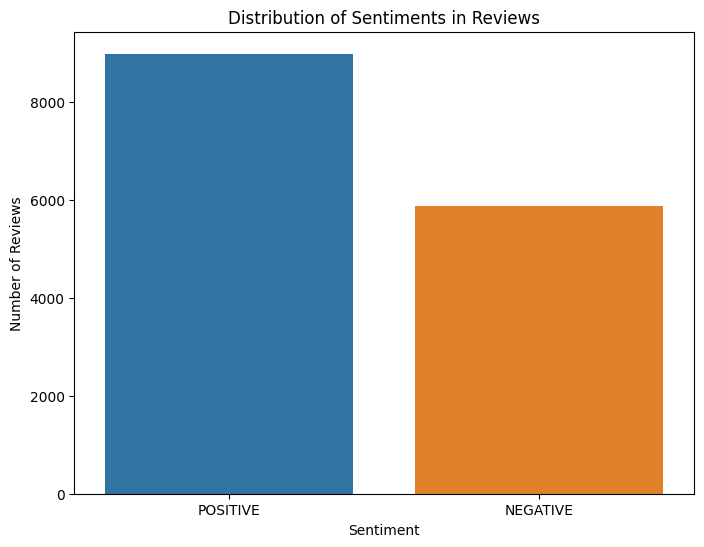

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = df_sentiments['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiments in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

The bar chart displays the distribution of sentiments in the reviews. From the chart, we can observe the counts for each sentiment category - POSITIVE and  NEGATIVE. This visualization provides a clear overview of the overall sentiment trends in the dataset.

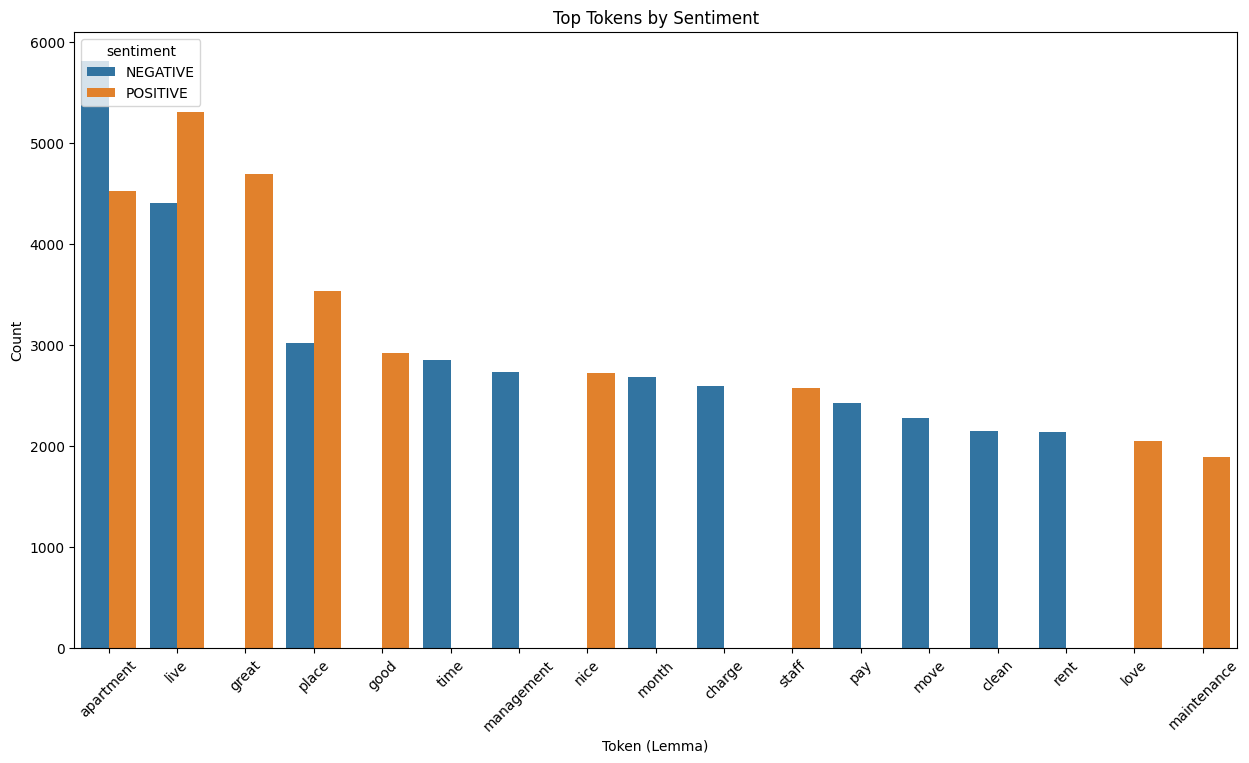

In [32]:
df_combined = pd.merge(df_tokens, df_sentiments, on='review_id')
token_sentiment_counts = df_combined.groupby(['lemma', 'sentiment']).size().reset_index(name='count')
top_tokens_by_sentiment = token_sentiment_counts.sort_values(by='count', ascending=False).head(20)
plt.figure(figsize=(15, 8))
sns.barplot(x='lemma', y='count', hue='sentiment', data=top_tokens_by_sentiment)
plt.title('Top Tokens by Sentiment')
plt.xlabel('Token (Lemma)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The bar chart illustrates the relationship between the top tokens (lemmas) and their associated sentiments in the reviews. For each token, we can see the distribution of sentiments - POSITIVE and NEGATIVE - and their respective counts. This visualization helps understand which words are most commonly associated with positive or negative sentiments in the dataset.

In [33]:
high_positive_reviews = df_sentiments[df_sentiments['sentiment'] == 'POSITIVE'].sort_values(by='score', ascending=False).head(5)
high_negative_reviews = df_sentiments[df_sentiments['sentiment'] == 'NEGATIVE'].sort_values(by='score', ascending=False).head(5)
selected_reviews = pd.concat([high_positive_reviews, high_negative_reviews])
detailed_review_analysis = pd.merge(selected_reviews, df_tokens, on='review_id')
detailed_review_analysis.head(10)

,review_id,sentiment,score,text,lemma,explain
0,ChZDSUhNMG9nS0VJQ0FnSURSdV91UVJ3EAE,POSITIVE,0.999895,Absolutely,absolutely,adverb
1,ChZDSUhNMG9nS0VJQ0FnSURSdV91UVJ3EAE,POSITIVE,0.999895,love,love,verb
2,ChZDSUhNMG9nS0VJQ0FnSURSdV91UVJ3EAE,POSITIVE,0.999895,living,live,verb
3,ChZDSUhNMG9nS0VJQ0FnSURSdV91UVJ3EAE,POSITIVE,0.999895,Great,great,adjective
4,ChZDSUhNMG9nS0VJQ0FnSURSdV91UVJ3EAE,POSITIVE,0.999895,amenities,amenity,noun
5,ChZDSUhNMG9nS0VJQ0FnSURSdV91UVJ3EAE,POSITIVE,0.999895,great,great,adjective
6,ChZDSUhNMG9nS0VJQ0FnSURSdV91UVJ3EAE,POSITIVE,0.999895,community,community,noun
7,ChZDSUhNMG9nS0VJQ0FnSURaOE1xM0xBEAE,POSITIVE,0.999894,Wonderful,wonderful,adjective
8,ChZDSUhNMG9nS0VJQ0FnSURaOE1xM0xBEAE,POSITIVE,0.999894,place,place,noun
9,ChZDSUhNMG9nS0VJQ0FnSURaOE1xM0xBEAE,POSITIVE,0.999894,addition,addition,noun


I have conducted a detailed analysis focusing on reviews with the highest positive and negative sentiment scores.

**Positive Reviews:** The analysis of the top positive reviews reveals tokens like "absolutely," "love," "living," "great," "amenities," and "community." These words suggest a strong appreciation for the reviewed aspects, emphasizing quality (e.g., great amenities, living conditions) and positive emotions (e.g., love).

**Negative Reviews:** The analysis of the top negative reviews highlights tokens such as "place," "run," "gross," "consistently," "smells," "dog," "piss," "management," "fails," and "quality." These words suggest significant dissatisfaction with various aspects of the experience. Terms like "gross" and "smells" indicate issues related to cleanliness or unpleasant conditions. The mention of "management" and "fails" points to potential problems with administration or service quality. Words such as "consistently" might imply that these negative experiences are not isolated incidents but regular occurrences. Additionally, nouns like "dog" and "piss" could be referencing specific hygiene or pet-related issues.

This detailed token analysis for each review helps understand the specific aspects that lead to positive or negative sentiments.

**Conclusion:** The visualizations provided offer a comprehensive overview of the sentiments and preferences of individuals reviewing various housing options, predominantly in the context of campus-related living. The distribution of review ratings indicates a bimodal pattern, with a significant number of high ratings (5 stars) and a lesser but notable cluster of low ratings (1 star), suggesting that while many reviewers are delighted, a segment of the population is distinctly dissatisfied. This polarization of experiences points to varying expectations or a difference in service quality.
The box plot for the distribution of likes per review reveals that while most reviews receive a relatively low number of likes, indicating engagement from a smaller audience, there are outliers with significantly higher likes. This could imply that specific reviews resonate more with the community, potentially due to the reviewers' expressiveness, the relevance of their opinions, or the extremity of their experiences. The category breakdown and the apartment ratings by likes provide a granular perspective on preferences and perceived quality, with some establishments leading in popularity and satisfaction. The sunburst chart further nuances this by showing the relationship between campuses and housing categories, highlighting the dominance of certain housing types in specific campus environments. Collectively, these insights can be instrumental for property management companies and universities to assess and enhance their residents' living experiences.